## 1. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. 데이터 불러오기 및 확인

In [2]:
# 열 이름에 '\t'가 있는 것을 보고 분리하여 데이터를 불러옴

raw = pd.read_csv('./delivery_raw.csv', delimiter = '\t')

# 데이터 행렬의 크기 (행, 열)
print(raw.shape,'\n')

raw

(197428, 16) 



,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift,total_busy,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [207]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

## 데이터 전처리 및 결측치 채우기

### **store_primary_category**
- NaN값은 최빈값으로 채움
- 음식 카테고리 12개로 묶어줌
- 수치형 데이터로 변환

In [209]:
category = raw['store_primary_category'].values.reshape(-1, 1)

imputer = SimpleImputer(strategy='most_frequent') # 모델 생성
imputer.fit(category) # 최빈값으로 결측치 채우기
category = imputer.transform(category)

raw['store_primary_category'] = pd.DataFrame(category, columns=['store_primary_category'])

In [210]:
# 북미
raw['store_primary_category'] = raw['store_primary_category'].replace(('american', 'hawaiian', 'cajun', 'barbecue', 'southern', 'mexican'), 'North America')
# 남미
raw['store_primary_category'] = raw['store_primary_category'].replace(('latin-american',  'brazilian', 'peruvian', 'argentine', 'caribbean'), 'South America')
# 유럽
raw['store_primary_category'] = raw['store_primary_category'].replace(('european', 'italian', 'mediterranean', 'greek', 'french', 'german', 'spanish', 'british', 'turkish', 'irish', 'belgian', 'tapas', 'pasta', 'steak', 'russian'), 'Europe')
# 동아시아
raw['store_primary_category'] = raw['store_primary_category'].replace(('asian', 'chinese', 'korean', 'japanese', 'sushi', 'thai', 'dim-sum'), 'East Asia')
# 동남아
raw['store_primary_category'] = raw['store_primary_category'].replace(('singaporean', 'vietnamese', 'filipino', 'burmese', 'indonesian', 'malaysian'), 'Southeast Asia')
# 서아시아
raw['store_primary_category'] = raw['store_primary_category'].replace(('nepalese', 'afghan', 'indian', 'pakistani'), 'Western Asia')
# 중동/아프리카
raw['store_primary_category'] = raw['store_primary_category'].replace(('middle-eastern', 'moroccan', 'persian', 'kosher', 'lebanese', 'african', 'ethiopian'), 'Arab Africa')
# 비건
raw['store_primary_category'] = raw['store_primary_category'].replace(('vegan', 'vegetarian'), 'Vegan')
# 카페
raw['store_primary_category'] = raw['store_primary_category'].replace(('dessert', 'chocolate', 'cafe', 'salad', 'smoothie', 'bubble-tea', 'gluten-free', 'cheese', 'sandwich'), 'Caffe')
# 패스트푸드
raw['store_primary_category'] = raw['store_primary_category'].replace(('burger', 'fast', 'pizza'), 'Fastfood')
# 그외에
raw['store_primary_category'] = raw['store_primary_category'].replace(('other', 'convenience-store', 'comfort-food', 'catering', 'seafood',  'soup', 'breakfast', 'alcohol', 'alcohol-plus-food', 'gastropub'), 'Other')

In [211]:
# Frequency Encoding

fe = raw.groupby('store_primary_category').size()/len(raw)
raw['category'] = raw['store_primary_category'].apply(lambda x : fe[x])

### **delivery_time**
- 'created_at'과 actual_delivery_time'의 dtype을 datetime으로 변경
- 주문 시간과 도착 시간의 차이를 통해 배달 시간인 delivery_time을 새로 만듦
- 배달이 2시간 넘게 걸린다는 것은 말이 안된다고 생각해서
- 7200초(2시간) 이하를 제외한 나머지는 제거함.

In [212]:
# 'created_at'과 actual_delivery_time'의 dtype을 datetime으로 변경

raw['created_at'] = pd.to_datetime(raw['created_at'])
raw['actual_delivery_time'] = pd.to_datetime(raw['actual_delivery_time'])

raw['delivery_time'] = (raw['actual_delivery_time'] - raw['created_at']).dt.total_seconds()

In [213]:
raw['delivery_time'] = raw['delivery_time'].fillna(raw['delivery_time'].mean())
raw = raw[raw['delivery_time'] <= 7200]

raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196338 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     195360 non-null  float64       
 1   created_at                                    196338 non-null  datetime64[ns]
 2   actual_delivery_time                          196331 non-null  datetime64[ns]
 3   store_id                                      196338 non-null  int64         
 4   store_primary_category                        196338 non-null  object        
 5   order_protocol                                195348 non-null  float64       
 6   total_items                                   196338 non-null  int64         
 7   subtotal                                      196338 non-null  int64         
 8   num_distinct_items                            196338 non-nu

### **estimated_store_to_consumer_driving_duration & total_outstanding_orders**
- 결측치 채움

In [214]:
raw['estimated_store_to_consumer_driving_duration'] = raw['estimated_store_to_consumer_driving_duration'].fillna(raw['estimated_store_to_consumer_driving_duration'].mean())
raw['total_outstanding_orders'] = raw['total_outstanding_orders'].fillna(raw['total_outstanding_orders'].mean())

### **상관관계 확인**

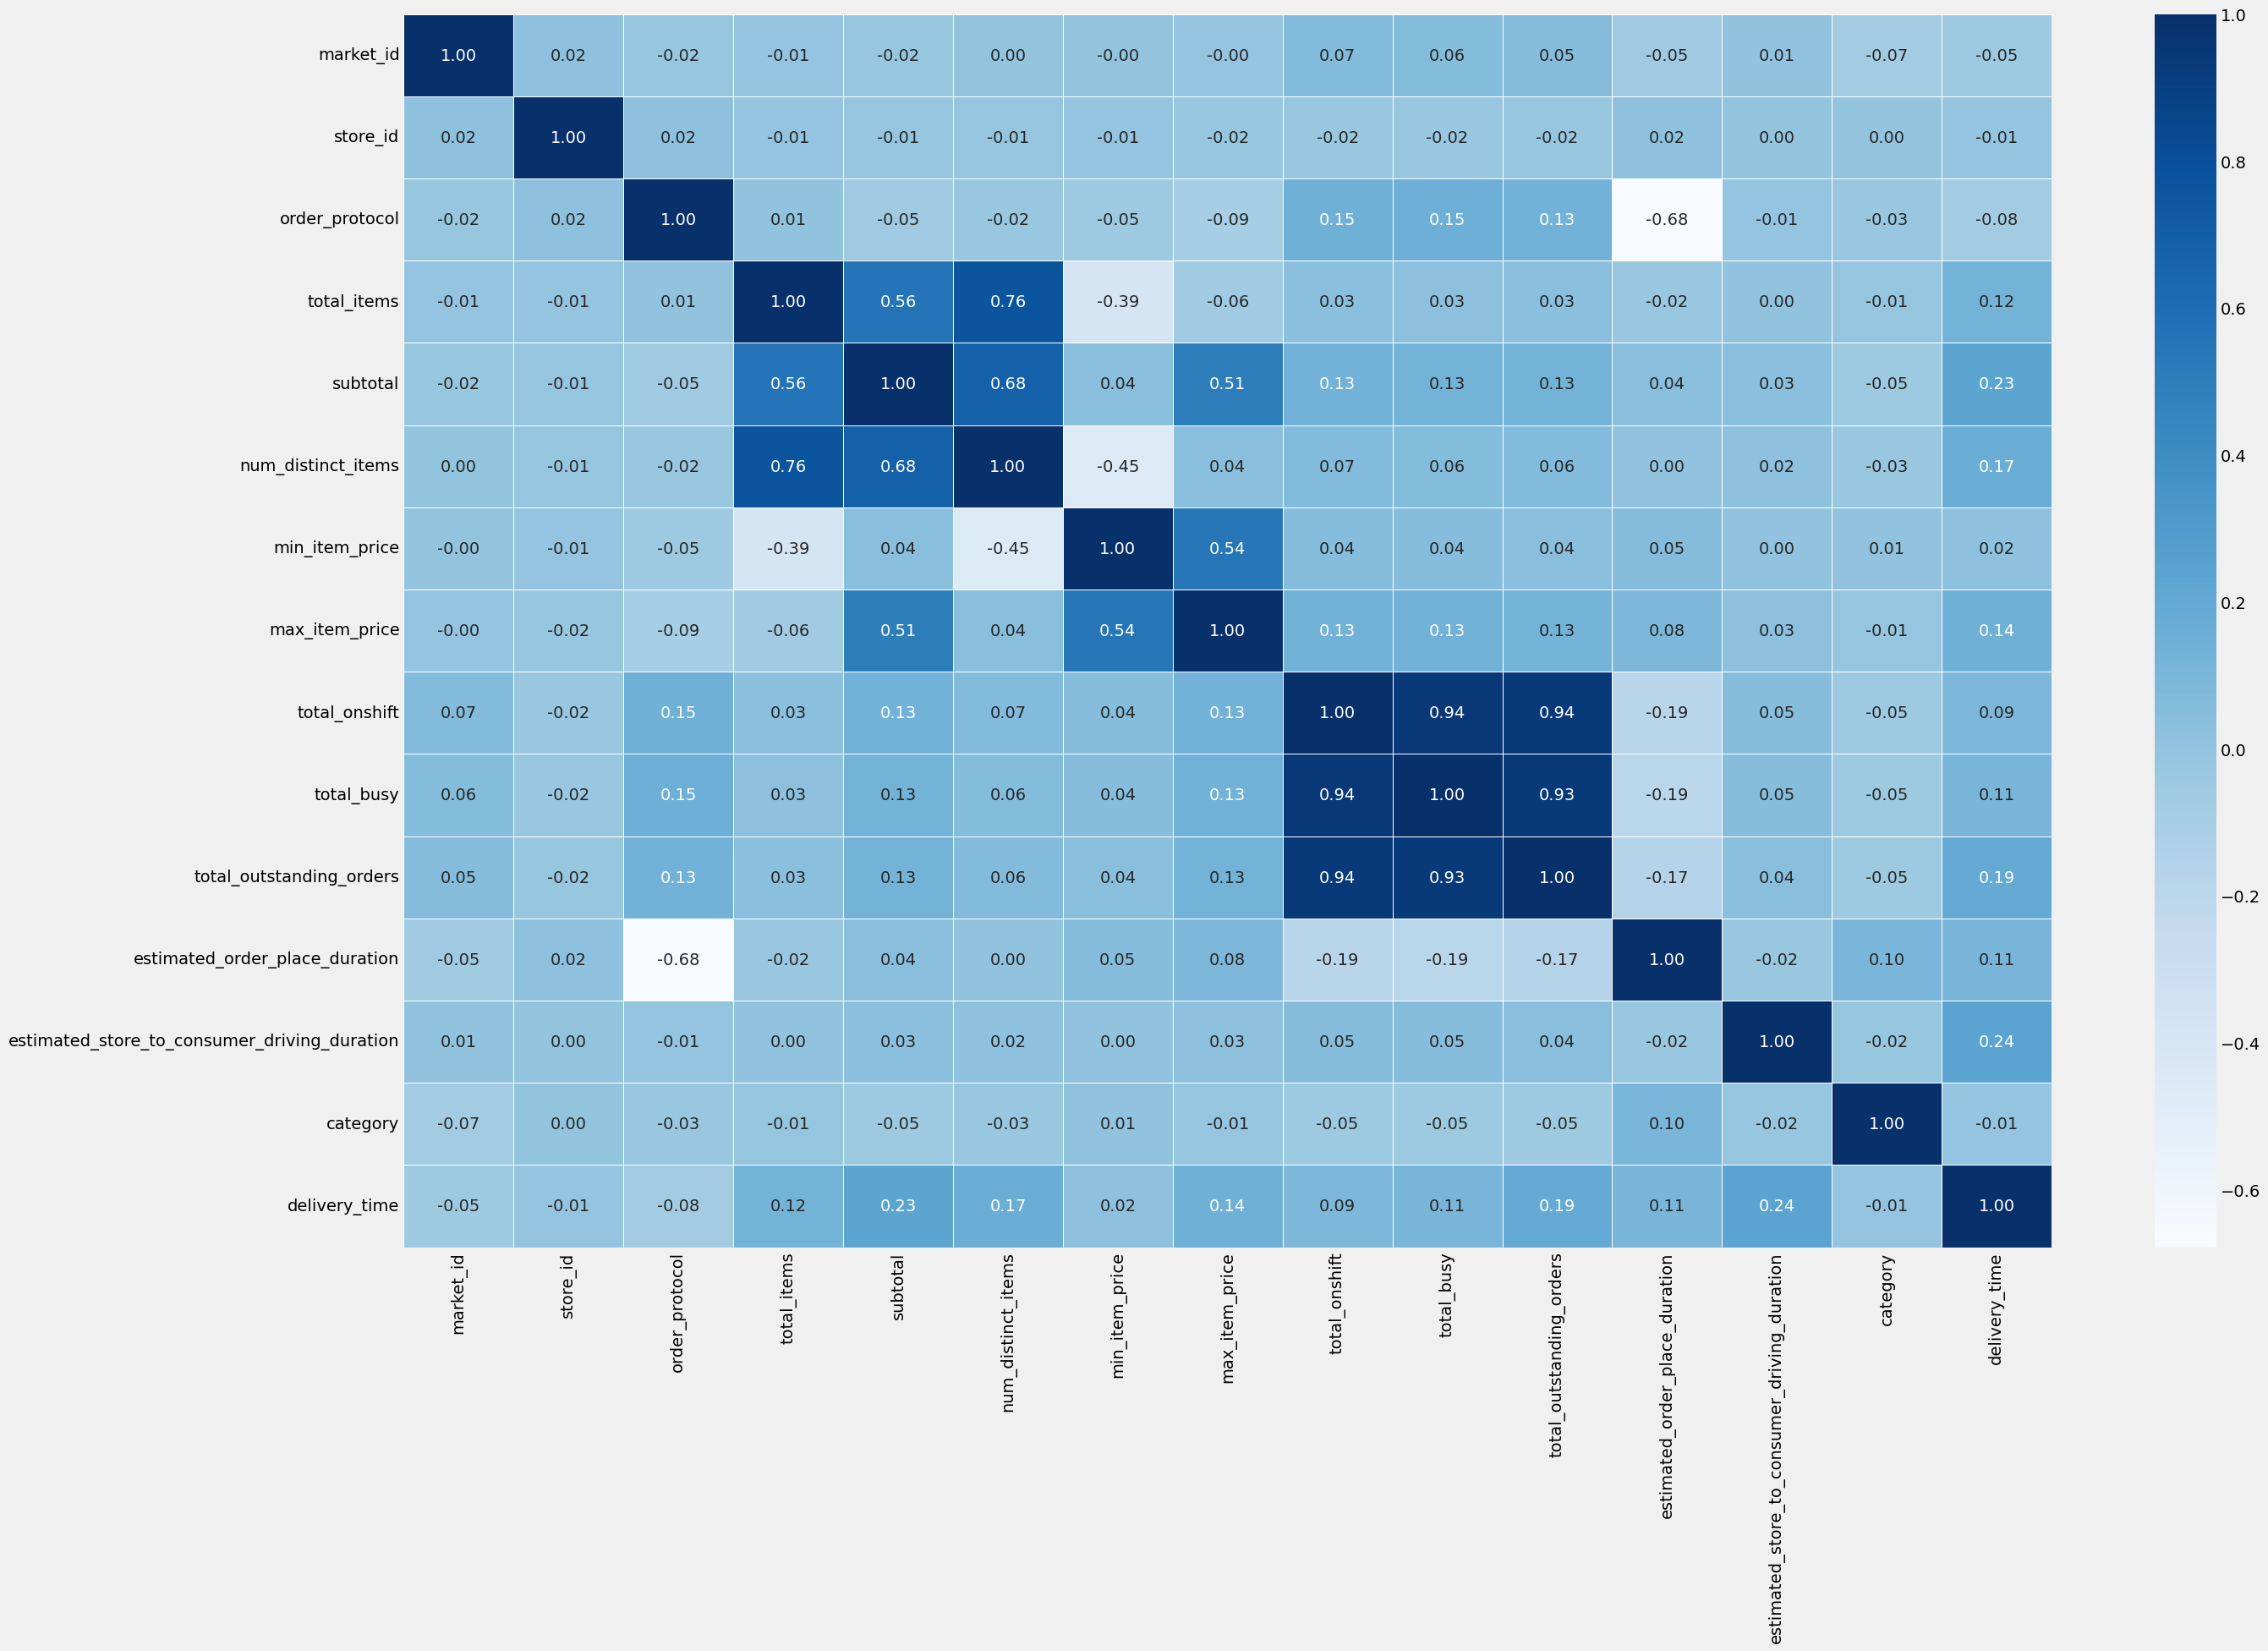

In [218]:
plt.figure(figsize=(28, 18))
sns.heatmap(raw.corr(numeric_only=True), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

## 데이터셋 나누기 & 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [244]:
train, test = train_test_split(raw, test_size=0.1, random_state=42)

print(train.shape)
print(test.shape)

(176704, 18)
(19634, 18)


In [245]:
features = ['category', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration']

X_train = train[features]
y_train = train['delivery_time']
X_test = test[features]
y_test = test['delivery_time']

### **RandomForest**

In [246]:
# 모델 학습

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [238]:
# 예측
predictions = model.predict(X_test)

In [239]:
# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

Root Mean Square Error (RMSE): 952.684221492716


In [252]:
# Under-prediction의 비율 계산
under_predictions = [pred for pred, actual in zip(predictions, y_test) if pred < actual]
under_prediction = len(under_predictions) / len(y_test)
print(f'Under-prediction Ratio: {under_prediction * 100}')

Under-prediction Ratio: 40.19048589182031
